# Setup

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Data cleaning: Nemsis data

In [0]:
nemsis_v2_nat_totals_df = pd.read_csv('gdrive/My Drive/nemsis_v2_national_monthly_totals_edited.csv', thousands=',')
nemsis_v2_reg_totals_df = pd.read_csv('gdrive/My Drive/nemsis_v2_regional_monthly_totals_edited.csv', thousands=',')
nemsis_v3_nat_totals_df = pd.read_csv('gdrive/My Drive/nemsis_v3_national_monthly_totals_edited.csv', thousands=',')
nemsis_v3_reg_totals_df = pd.read_csv('gdrive/My Drive/nemsis_v3_regional_monthly_totals_edited.csv', thousands=',')

In [0]:
nemsis_v3_nat_totals_df = nemsis_v3_nat_totals_df.drop(['Year', 'Month'], axis=1)
nemsis_v3_reg_totals_df = nemsis_v3_reg_totals_df.drop(['Year', 'Month'], axis=1)

In [0]:
nemsis_v3_nat_totals_df = nemsis_v3_nat_totals_df.rename(columns={"Date": "Month"})
nemsis_v3_reg_totals_df = nemsis_v3_reg_totals_df.rename(columns={"Date": "Month", "Geographic Region of Incident.US Census Regions": "Region"})

In [0]:
nemsis_v3_reg_totals_df = nemsis_v3_reg_totals_df.rename(columns={"Census Region": "Region"})

In [0]:
nemsis_v2_reg_totals_df = nemsis_v2_reg_totals_df.rename(columns={"Census Region": "Region"})

In [0]:
nemsis_nat_totals_df = nemsis_v2_nat_totals_df.append(nemsis_v3_nat_totals_df)
nemsis_reg_totals_df = nemsis_v2_reg_totals_df.append(nemsis_v3_reg_totals_df)

In [0]:
nemsis_nat_totals_df.to_csv('nemsis_v2v3_national_monthly_totals.csv')
nemsis_reg_totals_df.to_csv('nemsis_v2v3_regional_monthly_totals.csv')

In [102]:
nemsis_nat_totals_df.head()

,Month,Count of Events
0,1/1/2014,2243815
1,2/1/2014,1987887
2,3/1/2014,2015797
3,4/1/2014,2020800
4,5/1/2014,2313754


In [0]:
nemsis_nat_totals_df[["Month"]] = nemsis_nat_totals_df[["Month"]].apply(pd.to_datetime)
nemsis_reg_totals_df[["Month"]] = nemsis_reg_totals_df[["Month"]].apply(pd.to_datetime)

In [0]:
nemsis_nat_totals_df = nemsis_nat_totals_df.rename(columns={"Count of Events": "Total Events"})
nemsis_reg_totals_df = nemsis_reg_totals_df.rename(columns={"Count of Events": "Total Events"})

In [0]:
nemsis_nat_med_df = pd.read_csv('gdrive/My Drive/nemsis_v2v3_monthly_medication.csv', thousands=',')
nemsis_reg_med_df = pd.read_csv('gdrive/My Drive/nemsis_v2v3_monthly_reg_medication.csv', thousands=',')
nemsis_nat_icd_df = pd.read_csv('gdrive/My Drive/nemsis_v2v3_monthly_icd.csv', thousands=',')
nemsis_reg_icd_df = pd.read_csv('gdrive/My Drive/nemsis_v2v3_monthly_reg_icd.csv', thousands=',')

In [0]:
nemsis_nat_med_df[["Month"]] = nemsis_nat_med_df[["Month"]].apply(pd.to_datetime)
nemsis_reg_med_df[["Month"]] = nemsis_reg_med_df[["Month"]].apply(pd.to_datetime)
nemsis_nat_icd_df[["Month"]] = nemsis_nat_icd_df[["Month"]].apply(pd.to_datetime)
nemsis_reg_icd_df[["Month"]] = nemsis_reg_icd_df[["Month"]].apply(pd.to_datetime)

In [0]:
nemsis_nat_med_df = nemsis_nat_med_df.merge(nemsis_nat_totals_df, how='outer', on='Month')
nemsis_reg_med_df = nemsis_reg_med_df.merge(nemsis_reg_totals_df, how='outer', on=['Month', 'Region'])
nemsis_nat_icd_df = nemsis_nat_icd_df.merge(nemsis_nat_totals_df, how='outer', on='Month')
nemsis_reg_icd_df = nemsis_reg_icd_df.merge(nemsis_reg_totals_df, how='outer', on=['Month', 'Region'])

In [0]:
for df in [nemsis_nat_med_df, nemsis_reg_med_df, nemsis_nat_icd_df, nemsis_reg_icd_df]:
  df[["Count of Events"]] = df[["Count of Events"]].apply(pd.to_numeric)
  df[["Total Events"]] = df[["Total Events"]].apply(pd.to_numeric)
  df['Ratio'] = df['Count of Events'] / df['Total Events']
  df['Ratio_1m'] = df['Count of Events'] / df['Total Events'] * 1000000

In [0]:
for df in [nemsis_nat_med_df, nemsis_reg_med_df, nemsis_nat_icd_df, nemsis_reg_icd_df]:
  df['Ratio_100k'] = df['Count of Events'] / df['Total Events'] * 100000

In [109]:
nemsis_nat_med_df.head()

,Month,Count of Events,Total Events,Ratio,Ratio_1m
0,2014-01-01,9940,2243815,0.004430,4429.955232
1,2014-02-01,9196,1987887,0.004626,4626.017475
2,2014-03-01,9870,2015797,0.004896,4896.326366
3,2014-04-01,10060,2020800,0.004978,4978.226445
4,2014-05-01,11590,2313754,0.005009,5009.175565


In [0]:
nemsis_nat_med_df.to_csv('nemsis_national_med_with_ratio.csv')
nemsis_reg_med_df.to_csv('nemsis_regional_med_with_ratio.csv')
nemsis_nat_icd_df.to_csv('nemsis_national_icd_with_ratio.csv')
nemsis_reg_icd_df.to_csv('nemsis_regional_icd_with_ratio.csv')

# Data cleaning: CDC data

In [0]:
cdc_df = pd.read_csv('gdrive/My Drive/cdc_opioids_region_clean.csv')

In [152]:
cdc_df.head()

,Census Region,Month,Deaths
0,Northeast,2014-01-01,894
1,Northeast,2014-02-01,793
2,Northeast,2014-03-01,872
3,Northeast,2014-04-01,751
4,Northeast,2014-05-01,849


In [0]:
cdc_df['Census Region'] = np.where(cdc_df['Census Region']!='United States', cdc_df['Census Region'].str[17:], cdc_df['Census Region'])

In [0]:
cdc_df[["Month"]] = cdc_df[["Month Code"]].apply(pd.to_datetime)

In [0]:
cdc_df = cdc_df.drop('Month Code', axis=1)

In [0]:
cdc_df.to_csv('cdc_opioid_region_clean.csv')

# Nemsis data plots

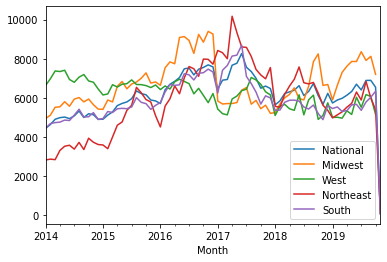

In [0]:
# medication
%matplotlib inline
ax = nemsis_nat_med_df.plot(x='Month', y='Ratio_1m', label='National')
nemsis_reg_med_df[nemsis_reg_med_df.Region == 'Midwest'].plot(x='Month', y='Ratio_1m', ax=ax, label='Midwest')
nemsis_reg_med_df[nemsis_reg_med_df.Region == 'West'].plot(x='Month', y='Ratio_1m', ax=ax, label='West')
nemsis_reg_med_df[nemsis_reg_med_df.Region == 'Northeast'].plot(x='Month', y='Ratio_1m', ax=ax, label='Northeast')
nemsis_reg_med_df[nemsis_reg_med_df.Region == 'South'].plot(x='Month', y='Ratio_1m', ax=ax, label='South')

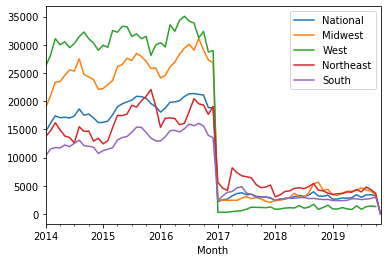

In [0]:
# ICD
%matplotlib inline
ax = nemsis_nat_icd_df.plot(x='Month', y='Ratio_1m', label='National')
nemsis_reg_icd_df[nemsis_reg_icd_df.Region == 'Midwest'].plot(x='Month', y='Ratio_1m', ax=ax, label='Midwest')
nemsis_reg_icd_df[nemsis_reg_icd_df.Region == 'West'].plot(x='Month', y='Ratio_1m', ax=ax, label='West')
nemsis_reg_icd_df[nemsis_reg_icd_df.Region == 'Northeast'].plot(x='Month', y='Ratio_1m', ax=ax, label='Northeast')
nemsis_reg_icd_df[nemsis_reg_icd_df.Region == 'South'].plot(x='Month', y='Ratio_1m', ax=ax, label='South')

# CDC data plots

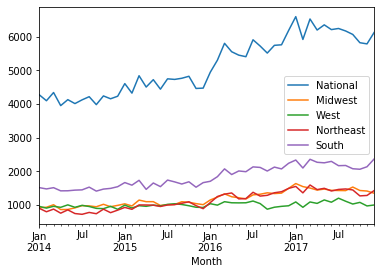

In [0]:
%matplotlib inline
ax = cdc_df[cdc_df['Census Region'] == 'United States'].plot(x='Month', y='Deaths', label='National')
cdc_df[cdc_df['Census Region'] == 'Midwest'].plot(x='Month', y='Deaths', ax=ax, label='Midwest')
cdc_df[cdc_df['Census Region'] == 'West'].plot(x='Month', y='Deaths', ax=ax, label='West')
cdc_df[cdc_df['Census Region'] == 'Northeast'].plot(x='Month', y='Deaths', ax=ax, label='Northeast')
cdc_df[cdc_df['Census Region'] == 'South'].plot(x='Month', y='Deaths', ax=ax, label='South')

# Comparison

## Medication: v2/v3

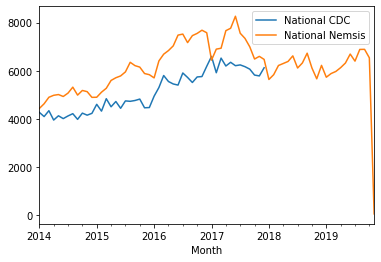

In [155]:
ax = cdc_df[cdc_df['Census Region'] == 'United States'].plot(x='Month', y='Deaths', label='National CDC')
nemsis_nat_med_df.plot(x='Month', y='Ratio_1m', ax=ax, label='National Nemsis')

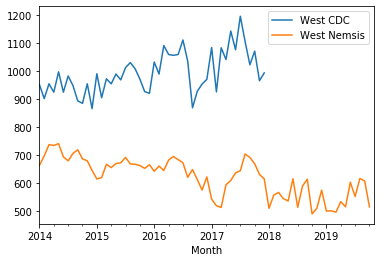

In [161]:
ax = cdc_df[cdc_df['Census Region'] == 'West'].plot(x='Month', y='Deaths', label='West CDC')
nemsis_reg_med_df[nemsis_reg_med_df.Region == 'West'].plot(x='Month', y='Ratio_100k', ax=ax, label='West Nemsis')

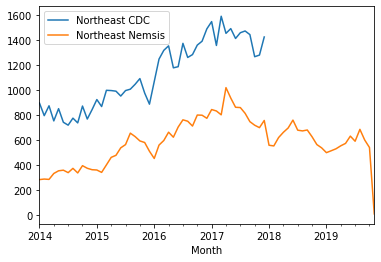

In [162]:
ax = cdc_df[cdc_df['Census Region'] == 'Northeast'].plot(x='Month', y='Deaths', label='Northeast CDC')
nemsis_reg_med_df[nemsis_reg_med_df.Region == 'Northeast'].plot(x='Month', y='Ratio_100k', ax=ax, label='Northeast Nemsis')

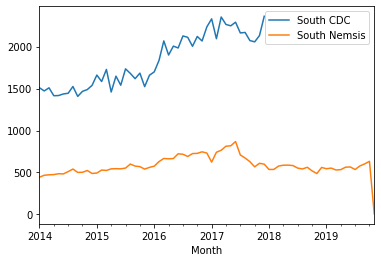

In [163]:
ax = cdc_df[cdc_df['Census Region'] == 'South'].plot(x='Month', y='Deaths', label='South CDC')
nemsis_reg_med_df[nemsis_reg_med_df.Region == 'South'].plot(x='Month', y='Ratio_100k', ax=ax, label='South Nemsis')

In [0]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [0]:
xcorr = [crosscorr(
    nemsis_nat_med_df['Ratio_1m'],
    cdc_df[cdc_df['Census Region'] == 'United States'].reset_index()['Deaths'], lag=i) for i in range(24)]
    
xcorr_midwest = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'Midwest'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'Midwest'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_west = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'West'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'West'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_northeast = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'Northeast'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'Northeast'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_south = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'South'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'South'].reset_index()['Deaths'], lag=i) for i in range(24)]

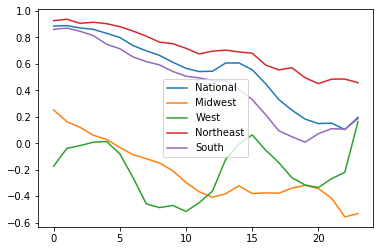

In [197]:
plt.plot(xcorr, label='National')
plt.plot(xcorr_midwest, label='Midwest')
plt.plot(xcorr_west, label='West')
plt.plot(xcorr_northeast, label='Northeast')
plt.plot(xcorr_south, label='South')
plt.legend()

## Medication: v2 data only

In [213]:
xcorr_v2 = [crosscorr(
    nemsis_nat_med_df[nemsis_nat_med_df['Month'] < '2017-01-01']['Ratio_1m'],
    cdc_df[cdc_df['Census Region'] == 'United States'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_midwest_v2 = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'Midwest'][nemsis_reg_med_df['Month'] < '2017-01-01'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'Midwest'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_west_v2 = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'West'][nemsis_reg_med_df['Month'] < '2017-01-01'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'West'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_northeast_v2 = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'Northeast'][nemsis_reg_med_df['Month'] < '2017-01-01'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'Northeast'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_south_v2 = [crosscorr(
    nemsis_reg_med_df[nemsis_reg_med_df['Region'] == 'South'][nemsis_reg_med_df['Month'] < '2017-01-01'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'South'].reset_index()['Deaths'], lag=i) for i in range(24)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


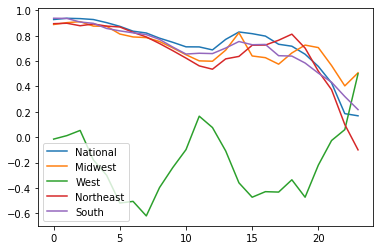

In [214]:
plt.plot(xcorr_v2, label='National')
plt.plot(xcorr_midwest_v2, label='Midwest')
plt.plot(xcorr_west_v2, label='West')
plt.plot(xcorr_northeast_v2, label='Northeast')
plt.plot(xcorr_south_v2, label='South')
plt.legend()

## ICD: v2

In [0]:
nemsis_nat_icd_df_v2 = nemsis_nat_icd_df[nemsis_nat_icd_df['Month'] < '2017-01-01']
nemsis_reg_icd_df_v2 = nemsis_reg_icd_df[nemsis_reg_icd_df['Month'] < '2017-01-01']

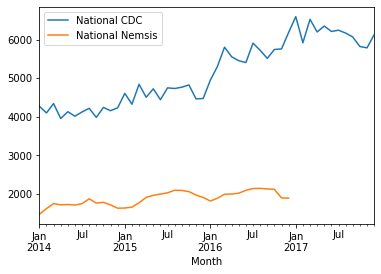

In [217]:
ax = cdc_df[cdc_df['Census Region'] == 'United States'].plot(x='Month', y='Deaths', label='National CDC')
nemsis_nat_icd_df_v2.plot(x='Month', y='Ratio_100k', ax=ax, label='National Nemsis')

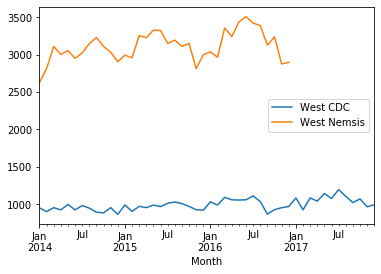

In [218]:
ax = cdc_df[cdc_df['Census Region'] == 'West'].plot(x='Month', y='Deaths', label='West CDC')
nemsis_reg_icd_df_v2[nemsis_reg_icd_df_v2.Region == 'West'].plot(x='Month', y='Ratio_100k', ax=ax, label='West Nemsis')

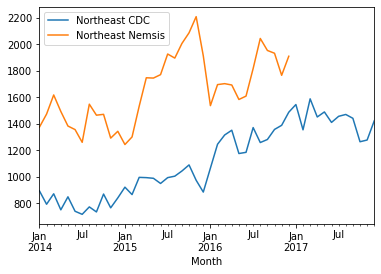

In [219]:
ax = cdc_df[cdc_df['Census Region'] == 'Northeast'].plot(x='Month', y='Deaths', label='Northeast CDC')
nemsis_reg_icd_df_v2[nemsis_reg_icd_df_v2.Region == 'Northeast'].plot(x='Month', y='Ratio_100k', ax=ax, label='Northeast Nemsis')

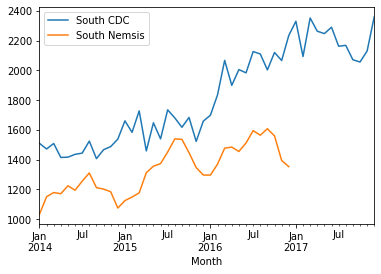

In [220]:
ax = cdc_df[cdc_df['Census Region'] == 'South'].plot(x='Month', y='Deaths', label='South CDC')
nemsis_reg_icd_df_v2[nemsis_reg_icd_df_v2.Region == 'South'].plot(x='Month', y='Ratio_100k', ax=ax, label='South Nemsis')

In [0]:
xcorr_icd_v2 = [crosscorr(
    nemsis_nat_icd_df_v2['Ratio_1m'],
    cdc_df[cdc_df['Census Region'] == 'United States'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_icd_midwest_v2 = [crosscorr(
    nemsis_reg_icd_df_v2[nemsis_reg_icd_df_v2['Region'] == 'Midwest'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'Midwest'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_icd_west_v2 = [crosscorr(
    nemsis_reg_icd_df_v2[nemsis_reg_icd_df_v2['Region'] == 'West'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'West'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_icd_northeast_v2 = [crosscorr(
    nemsis_reg_icd_df_v2[nemsis_reg_icd_df_v2['Region'] == 'Northeast'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'Northeast'].reset_index()['Deaths'], lag=i) for i in range(24)]

xcorr_icd_south_v2 = [crosscorr(
    nemsis_reg_icd_df_v2[nemsis_reg_icd_df_v2['Region'] == 'South'].reset_index()['Ratio_100k'],
    cdc_df[cdc_df['Census Region'] == 'South'].reset_index()['Deaths'], lag=i) for i in range(24)]

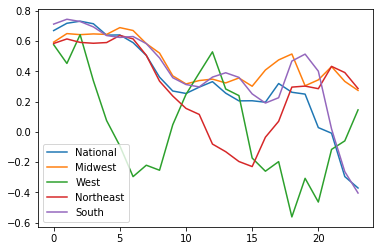

In [222]:
plt.plot(xcorr_icd_v2, label='National')
plt.plot(xcorr_icd_midwest_v2, label='Midwest')
plt.plot(xcorr_icd_west_v2, label='West')
plt.plot(xcorr_icd_northeast_v2, label='Northeast')
plt.plot(xcorr_icd_south_v2, label='South')
plt.legend()

## ICD: v3

In [0]:
nemsis_nat_icd_df_v3 = nemsis_nat_icd_df[nemsis_nat_icd_df['Month'] >= '2017-01-01']
nemsis_reg_icd_df_v3 = nemsis_reg_icd_df[nemsis_reg_icd_df['Month'] >= '2017-01-01']
cdc_df_v3 = cdc_df[cdc_df['Month'] >= '2017-01-01']

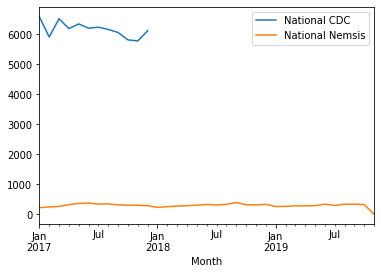

In [226]:
ax = cdc_df_v3[cdc_df_v3['Census Region'] == 'United States'].plot(x='Month', y='Deaths', label='National CDC')
nemsis_nat_icd_df_v3.plot(x='Month', y='Ratio_100k', ax=ax, label='National Nemsis')

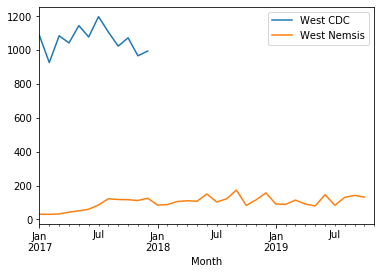

In [227]:
ax = cdc_df_v3[cdc_df_v3['Census Region'] == 'West'].plot(x='Month', y='Deaths', label='West CDC')
nemsis_reg_icd_df_v3[nemsis_reg_icd_df_v3.Region == 'West'].plot(x='Month', y='Ratio_100k', ax=ax, label='West Nemsis')

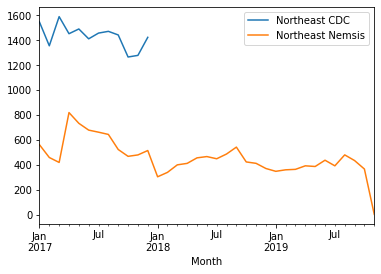

In [228]:
ax = cdc_df_v3[cdc_df_v3['Census Region'] == 'Northeast'].plot(x='Month', y='Deaths', label='Northeast CDC')
nemsis_reg_icd_df_v3[nemsis_reg_icd_df_v3.Region == 'Northeast'].plot(x='Month', y='Ratio_100k', ax=ax, label='Northeast Nemsis')

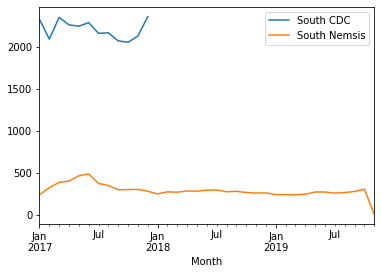

In [229]:
ax = cdc_df_v3[cdc_df_v3['Census Region'] == 'South'].plot(x='Month', y='Deaths', label='South CDC')
nemsis_reg_icd_df_v3[nemsis_reg_icd_df_v3.Region == 'South'].plot(x='Month', y='Ratio_100k', ax=ax, label='South Nemsis')

In [233]:
xcorr_icd_v3 = [crosscorr(
    nemsis_nat_icd_df_v3.reset_index()['Ratio_1m'],
    cdc_df_v3[cdc_df_v3['Census Region'] == 'United States'].reset_index()['Deaths'], lag=i) for i in range(12)]

xcorr_icd_midwest_v3 = [crosscorr(
    nemsis_reg_icd_df_v3[nemsis_reg_icd_df_v3['Region'] == 'Midwest'].reset_index()['Ratio_100k'],
    cdc_df_v3[cdc_df_v3['Census Region'] == 'Midwest'].reset_index()['Deaths'], lag=i) for i in range(12)]

xcorr_icd_west_v3 = [crosscorr(
    nemsis_reg_icd_df_v3[nemsis_reg_icd_df_v3['Region'] == 'West'].reset_index()['Ratio_100k'],
    cdc_df_v3[cdc_df_v3['Census Region'] == 'West'].reset_index()['Deaths'], lag=i) for i in range(12)]

xcorr_icd_northeast_v3 = [crosscorr(
    nemsis_reg_icd_df_v3[nemsis_reg_icd_df_v3['Region'] == 'Northeast'].reset_index()['Ratio_100k'],
    cdc_df_v3[cdc_df_v3['Census Region'] == 'Northeast'].reset_index()['Deaths'], lag=i) for i in range(12)]

xcorr_icd_south_v3 = [crosscorr(
    nemsis_reg_icd_df_v3[nemsis_reg_icd_df_v3['Region'] == 'South'].reset_index()['Ratio_100k'],
    cdc_df_v3[cdc_df_v3['Census Region'] == 'South'].reset_index()['Deaths'], lag=i) for i in range(12)]

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


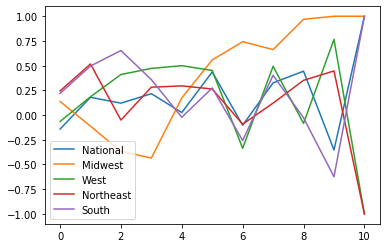

In [234]:
plt.plot(xcorr_icd_v3, label='National')
plt.plot(xcorr_icd_midwest_v3, label='Midwest')
plt.plot(xcorr_icd_west_v3, label='West')
plt.plot(xcorr_icd_northeast_v3, label='Northeast')
plt.plot(xcorr_icd_south_v3, label='South')
plt.legend()